In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib import rc

In [62]:

def get_data_list(metric,day,data_source,data_df):
    directory = 'outputs'
    for f in os.listdir(directory):
        if metric in f and day in f and data_source in f:
            df = pd.read_csv(directory+'/'+f,index_col=0)
            
            df = pd.DataFrame(np.abs(df.values),columns=df.columns if len(df.columns)>2 else [metric])
            if len(df.columns)<2 and 'TRM' in df.columns:
                print('error')
            graph_n = f.replace(metric+'_'+day,'').replace(data_source+'.csv','')
            if graph_n in data_df[data_df.source == data_source].graph.values:
                start_ind = list((data_df.source == data_source) & (data_df.graph == graph_n)).index(True)
                if df.shape[1]>1:
                    for i in range(5):
                        for j in range(5):
                            data_df.iloc[start_ind+j,i+int(metric=='runtimes')*5] = df.iloc[j,i]
                else:
                    for j in range(5):
                        data_df.iloc[start_ind+j,list(data_df.columns).index(metric)] = df.iloc[j,0]
            else:
                df['graph'] = [graph_n]*df.shape[0]
                df['epsilon'] = [1,.8,.6,.4,.2]
                df['source'] = [data_source]*5
                df['day'] = [day]*5
                if df.shape[1]>6:
                    
                    df.columns = [col for col in data_df.columns if metric in col]+['graph','epsilon','source','day']
                    for col in data_df.columns:
                        if not (col in df.columns):
                            df[col] = [np.nan]*5
                data_df = data_df.append(df,ignore_index=True)
   
            
    return data_df



In [63]:
'scores' in 'TRM_scores'

True

In [70]:
sources = ['citi','capital','blue']
score_cols = ['TRM_scores','Local Ratio_scores', 'HS_scores', 'GHS_scores', 'IHS_scores']
rt_cols = ['TRM_runtimes','Local Ratio_runtimes', 'HS_runtimes',  'GHS_runtimes', 'IHS_runtimes']
df = pd.DataFrame(columns=score_cols+ rt_cols+['graph','graphs','epsilon','sdists','source'],)
for metric in ['sdists','graphs','runtimes','scores']:
    for day in ['weekend','weekday']:
        for source in sources:
            df=get_data_list(metric,day,source,df)
for col in score_cols+rt_cols+['epsilon']:
    df[col]=pd.to_numeric(df[col])
df

,TRM_scores,Local Ratio_scores,HS_scores,GHS_scores,IHS_scores,TRM_runtimes,Local Ratio_runtimes,HS_runtimes,GHS_runtimes,IHS_runtimes,graph,graphs,epsilon,sdists,source,day
0,692346.285186,685250.300685,687213.350282,689755.663480,691124.589140,0.310628,129.335505,6.022776,69.637611,2.434401,2,298,1.0,633087.699468,citi,weekend
1,569231.137251,563855.507564,560947.762787,566514.724369,567728.334120,0.212604,87.586148,4.944565,106.026756,2.712350,2,262,0.8,516530.137038,citi,weekend
2,433748.614372,429050.626577,433081.010181,426347.443753,429624.613137,0.147702,60.896773,2.991396,59.131935,1.595760,2,226,0.6,390525.198111,citi,weekend
3,323371.943605,313739.918551,310963.296698,318778.236008,316892.549309,0.093535,35.674491,4.666044,37.211468,3.560343,2,190,0.4,259643.386418,citi,weekend
4,170811.867832,164782.548149,168224.663667,165611.066005,165557.277162,0.050584,12.713381,0.959369,33.484937,0.990126,2,154,0.2,152514.367399,citi,weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,223697.333989,223375.877430,223649.200427,223649.200427,223649.200427,1.115685,6.622550,0.757161,23.772727,0.552413,0,130,1.0,198589.077426,blue,weekday
226,183309.138747,184286.892116,183669.325345,183898.973067,183642.252086,0.052084,5.681884,0.448551,22.847250,0.456992,0,115,0.8,166238.945484,blue,weekday
227,139355.755503,135941.008157,139193.770906,137044.160153,139004.020462,0.038034,4.084356,0.600512,26.235159,0.432966,0,101,0.6,117244.255227,blue,weekday
228,107143.859695,107939.428881,105040.107836,105216.587735,105216.587735,0.026395,3.070088,0.516859,22.944528,0.474841,0,87,0.4,80352.696533,blue,weekday


In [34]:
def get_det_group(source,day):
    capit_we = df.loc[(df.source==source) & (df.day==day),:].copy()
    df_temp = pd.DataFrame()
    det_cols = []
    for c in score_cols:
        det_col = c.split('_')[0]+'_det'
        det_cols.append(det_col)
        df_temp[det_col] = pd.to_numeric(arg=(capit_we[c].values-capit_we['sdists'].values)/capit_we['sdists'].values)
    df_temp['epsilon'] = capit_we.epsilon.values
    return df_temp, det_cols


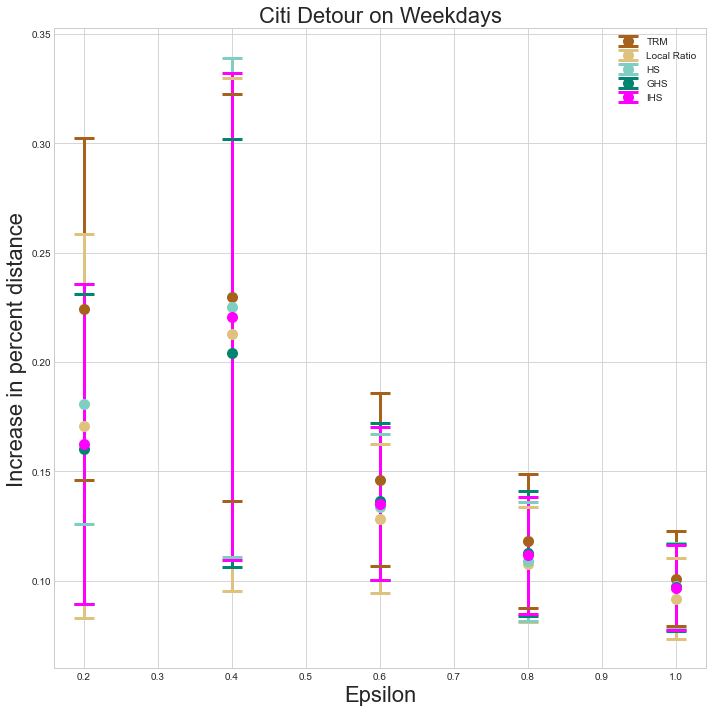

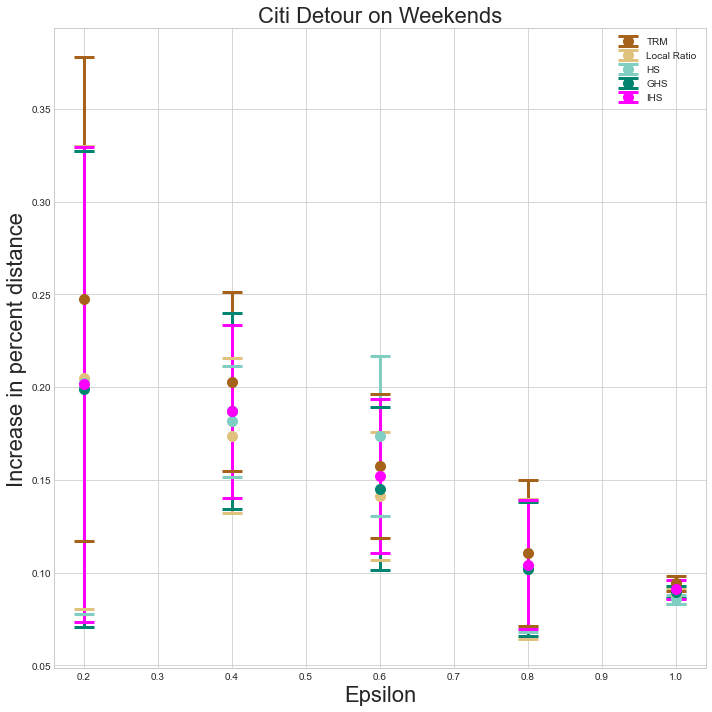

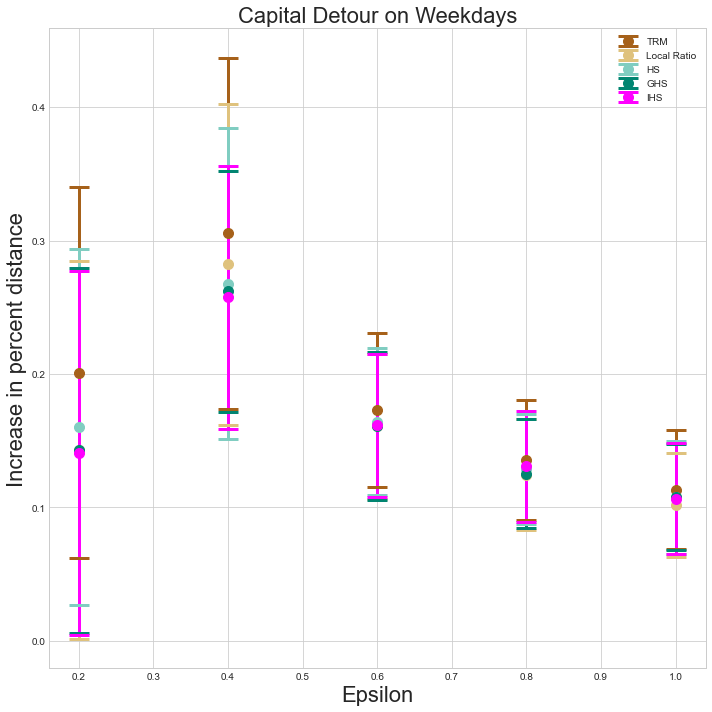

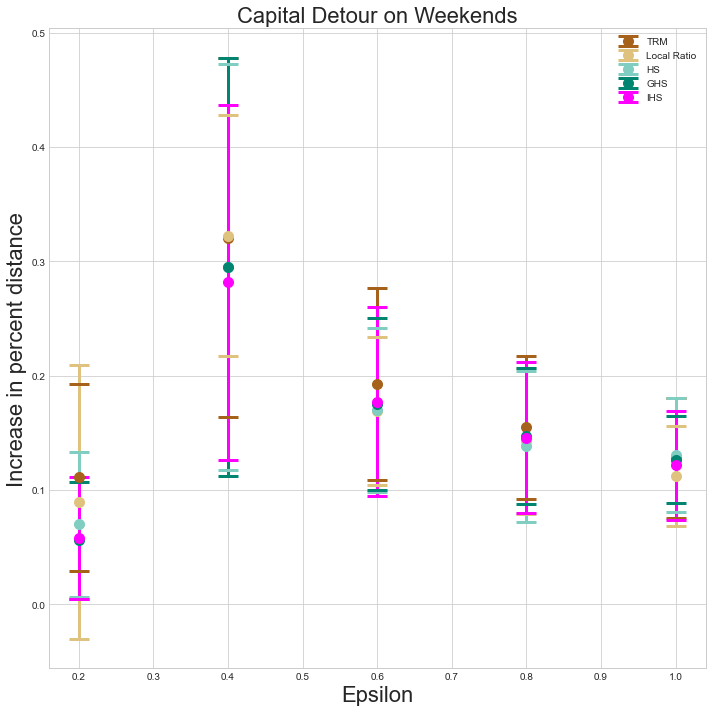

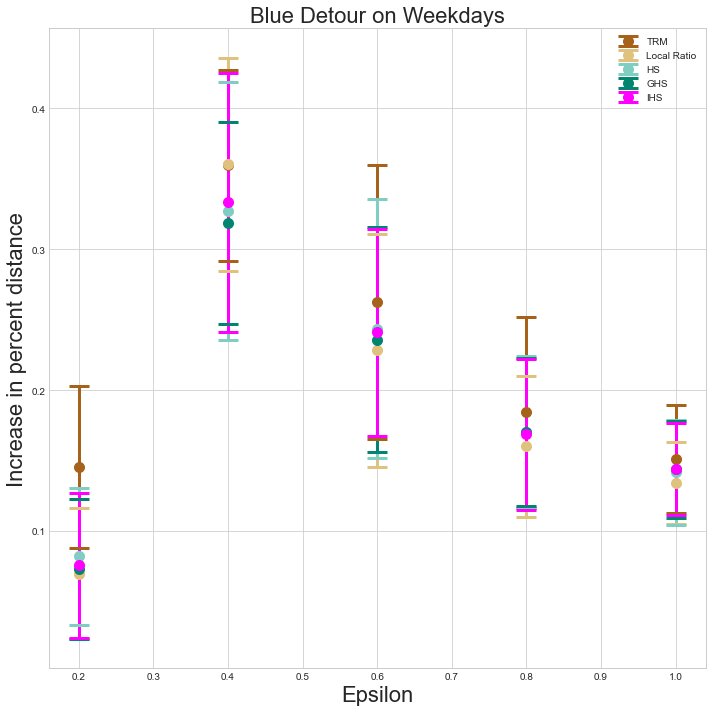

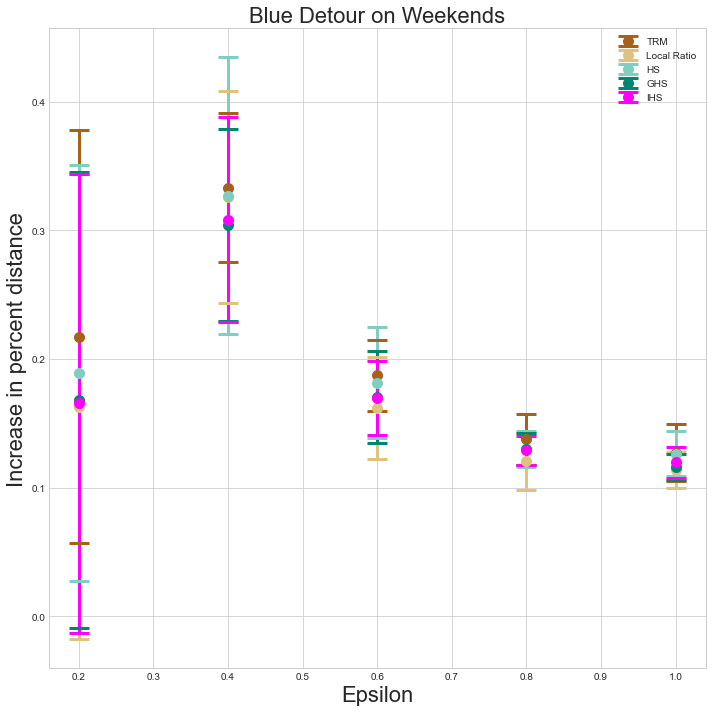

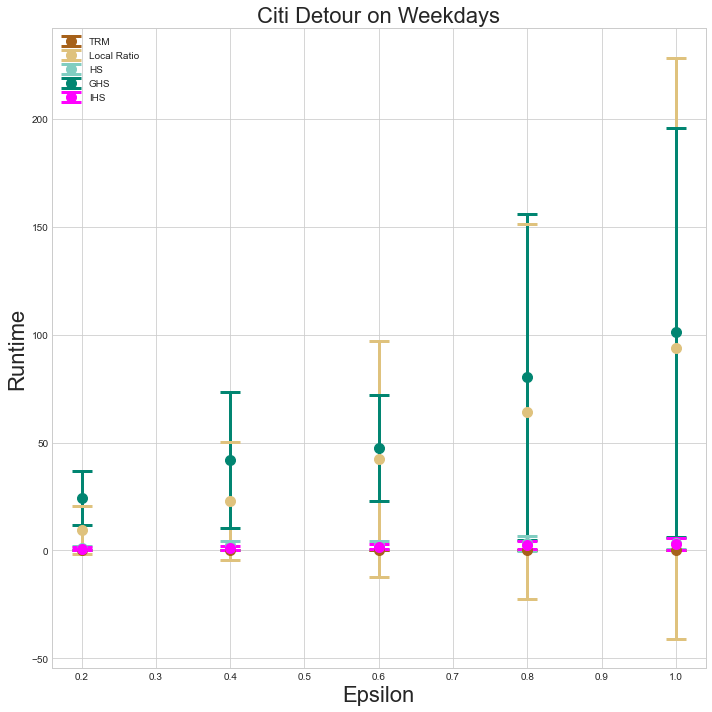

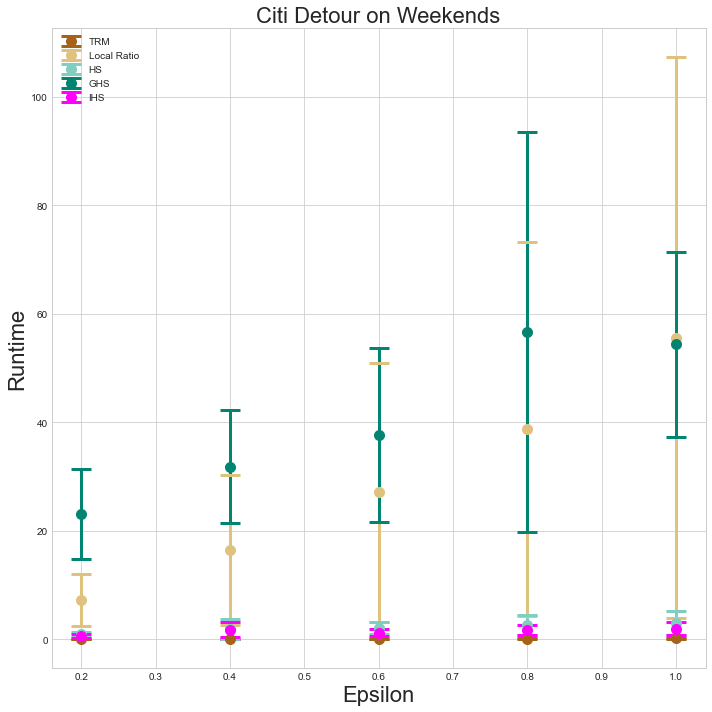

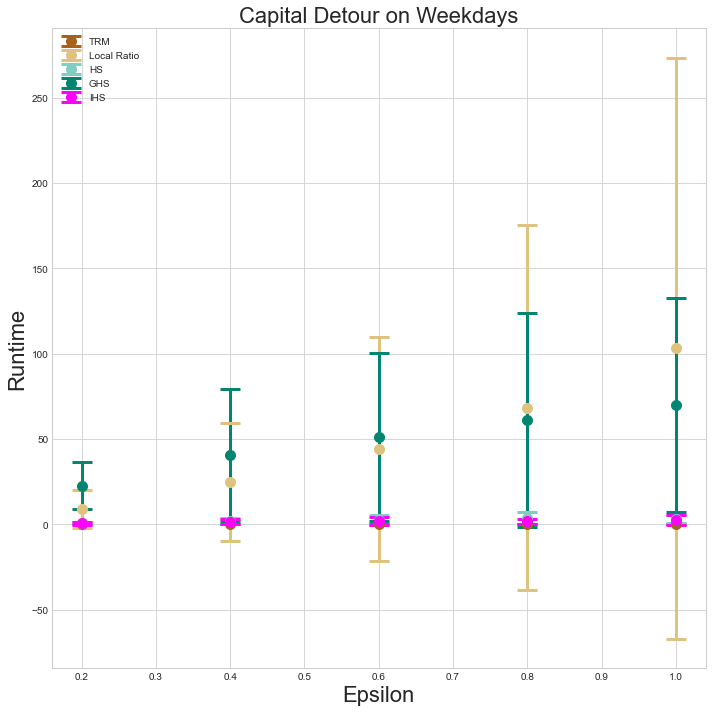

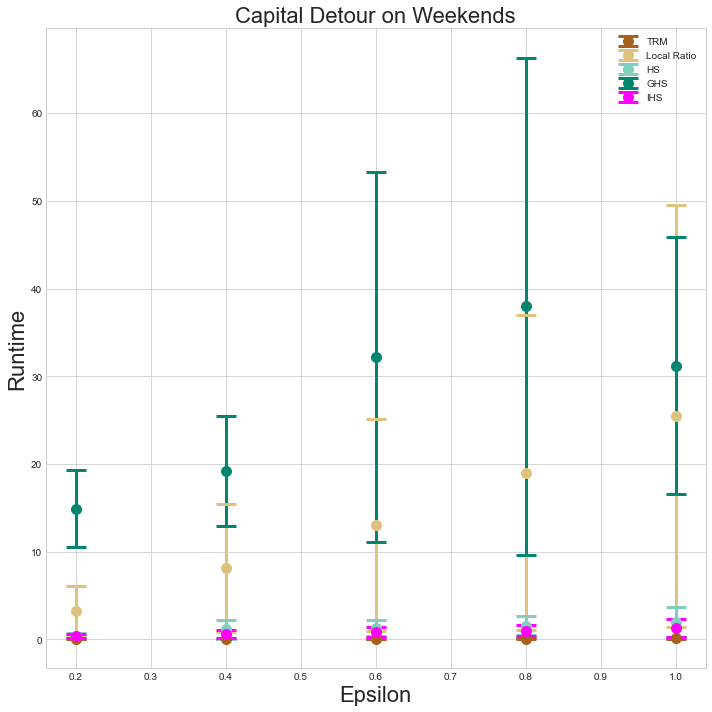

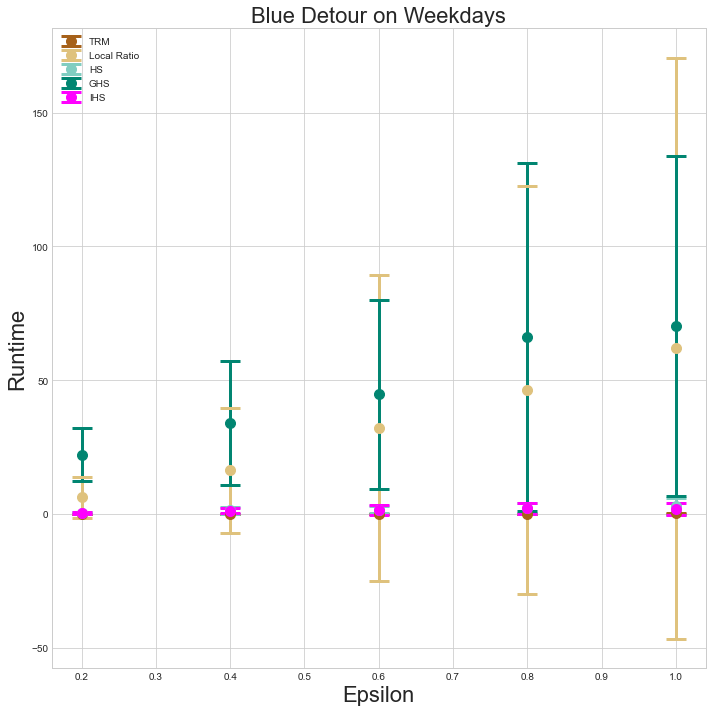

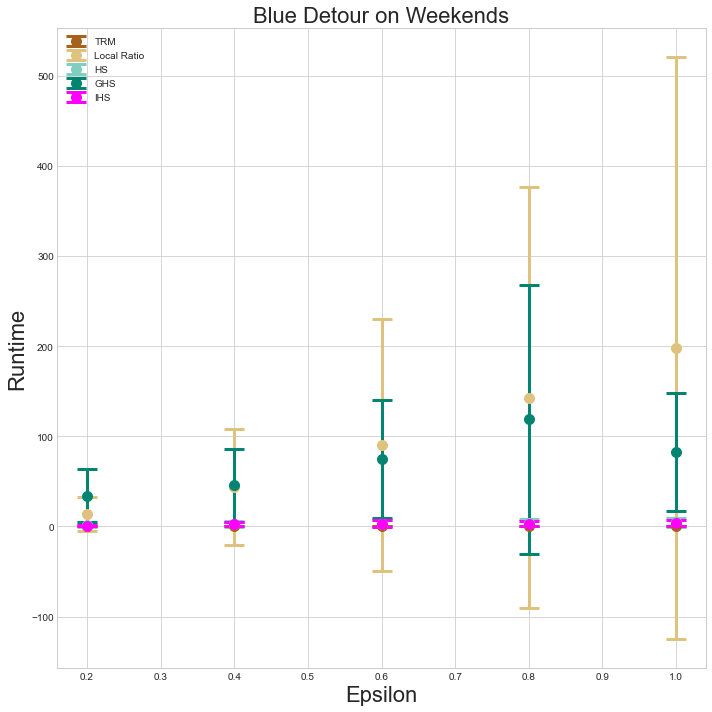

In [6]:
font = {'size'   : 22}
plt.style.use('seaborn-whitegrid')
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
colors = ['#a6611a', '#dfc27d', '#80cdc1', '#018571','#FF00FF']
color = 0
for source in sources:
    for day in ['weekday','weekend']:
        plt.style.use('seaborn-whitegrid')
        temp_df, det_cols = get_det_group(source,day)
        group = temp_df.groupby('epsilon')
        fig, ax = plt.subplots()
    

        for c in det_cols: 
            ax.errorbar(group.groups.keys(), group[c].mean(), yerr=group[c].std(),label=c.split('_')[0],fmt='o',c=colors[color],ms=10,capsize=10,capthick=3,elinewidth=3)
            color +=1
        color = 0
        plt.title(source.capitalize() +' Detour on '+day.capitalize()+'s',**font)
        plt.legend()
        ax.set_ylabel('Increase in percent distance',**font)
        ax.set_xlabel('Epsilon',**font)
        fig.set_size_inches(10, 10)
        
        fig.tight_layout()
        fig.savefig('figures/'+source+'_'+day+'scores15')
        plt.show()
        
for source in sources:
    for day in ['weekday','weekend']:
        plt.style.use('seaborn-whitegrid')
        fig, ax = plt.subplots()
        group = df.loc[(df.source == source) & (df.day==day)].groupby('epsilon')
        for c in rt_cols: 
            ax.errorbar(group.groups.keys(), group[c].mean(), yerr=group[c].std(),label=c.split('_')[0],fmt='o',c=colors[color],ms=10,capsize=10,capthick=3,elinewidth=3)
            color +=1
        color = 0
        plt.title(source.capitalize()+' Detour on '+day.capitalize()+'s',**font)
        ax.set_ylabel('Runtime',**font)
        ax.set_xlabel('Epsilon',**font)
        fig.set_size_inches(10, 10)
        fig.tight_layout()
        plt.legend()
        fig.savefig('figures/'+source+'_'+day+'rt15')
        plt.show()

In [16]:
day='weekday'
latex,det_cols = get_det_group(sources[0],day)
latex = latex.groupby('epsilon').mean()
if len(sources)>1:
    for source in sources[1:]:
        latex.append(df.loc[(df.source == source) & (df.day==day),score_cols+['epsilon']].groupby('epsilon').mean().astype(int))

for source in sources:
    latex.append(df.loc[(df.source == source) & (df.day==day),score_cols+['epsilon']].groupby('epsilon').mean().astype(int))

In [17]:
for day in ['weekend','weekday']
for source in sources:
    latex,det_cols = get_det_group(sources,day)
    print

,TRM_det,Local Ratio_det,HS_det,GHS_det,IHS_det
epsilon,,,,,
0.2,0.200933,0.143002,0.160208,0.142775,0.140830
0.4,0.305617,0.282223,0.267789,0.261918,0.257528
0.6,0.172923,0.160777,0.164183,0.160992,0.161453
0.8,0.135500,0.124404,0.128726,0.125232,0.130651
1.0,0.113262,0.101710,0.107457,0.107610,0.106606


In [91]:
source='capital'
for day in ['weekend','weekday']:
    temp = get_det_group(source,day)[0].groupby('epsilon').mean()
    temp.index = [str(i)+' '+day.capitalize() for i in temp.index]
    temp.columns = [c.split('_')[0] for c in temp.columns]
    print(temp.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &       TRM &  Local Ratio &        HS &       GHS &       IHS \\
\midrule
0.2 Weekend &  0.111097 &     0.089594 &  0.070129 &  0.056021 &  0.058098 \\
0.4 Weekend &  0.320667 &     0.322515 &  0.294986 &  0.295386 &  0.281798 \\
0.6 Weekend &  0.192898 &     0.169015 &  0.170367 &  0.175234 &  0.177393 \\
0.8 Weekend &  0.154946 &     0.143194 &  0.138182 &  0.147279 &  0.145936 \\
1.0 Weekend &  0.128286 &     0.112275 &  0.130440 &  0.126641 &  0.121815 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrrr}
\toprule
{} &       TRM &  Local Ratio &        HS &       GHS &       IHS \\
\midrule
0.2 Weekday &  0.200933 &     0.143002 &  0.160208 &  0.142775 &  0.140830 \\
0.4 Weekday &  0.305617 &     0.282223 &  0.267789 &  0.261918 &  0.257528 \\
0.6 Weekday &  0.172923 &     0.160777 &  0.164183 &  0.160992 &  0.161453 \\
0.8 Weekday &  0.135500 &     0.124404 &  0.128726 &  0.125232 &  0.130651 \\
1.0 Weekday &  0.113262 &     0.101710 &  0.10745

In [96]:
source='blue'
for day in ['weekend','weekday']:
    temp = df.loc[(df.source == source) & (df.day==day),['epsilon']+rt_cols].groupby('epsilon').mean()
    temp.index = [str(i)+' '+day.capitalize() for i in temp.index]
    temp.columns = [c.split('_')[0] for c in temp.columns]
    print(temp.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &       TRM &  Local Ratio &        HS &         GHS &       IHS \\
\midrule
0.2 Weekend &  0.046487 &    13.744543 &  1.112205 &   33.867332 &  0.929549 \\
0.4 Weekend &  0.076009 &    43.303129 &  2.419256 &   45.848677 &  2.265223 \\
0.6 Weekend &  0.167415 &    90.279063 &  3.163388 &   74.770531 &  2.920282 \\
0.8 Weekend &  0.165571 &   143.057731 &  3.936698 &  118.992375 &  3.078617 \\
1.0 Weekend &  0.211958 &   197.634455 &  4.724994 &   82.956979 &  3.399177 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrrr}
\toprule
{} &       TRM &  Local Ratio &        HS &        GHS &       IHS \\
\midrule
0.2 Weekday &  0.034870 &     6.240158 &  0.564972 &  22.150627 &  0.487182 \\
0.4 Weekday &  0.055293 &    16.368277 &  1.439514 &  34.054010 &  1.287420 \\
0.6 Weekday &  0.083639 &    32.136016 &  1.679880 &  44.714765 &  1.551424 \\
0.8 Weekday &  0.120072 &    46.394507 &  2.265648 &  66.234170 &  2.141457 \\
1.0 Weekday &  0.271845 &    61.